## Grundlagen Maschineller Lernverfahren | INF20A | 2022

**Datum: 28.10.2022**


# Optimierung


In [32]:
# Lade notwendige Bibliotheken

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set()

In [34]:
# Pseudo Zufallszahlen

np.random.seed(2020)

## Daten erstellen


In [35]:
# Daten erstellen 

X = 2*np.random.rand(100,1)
y = 4+3*X + np.random.rand(100,1)

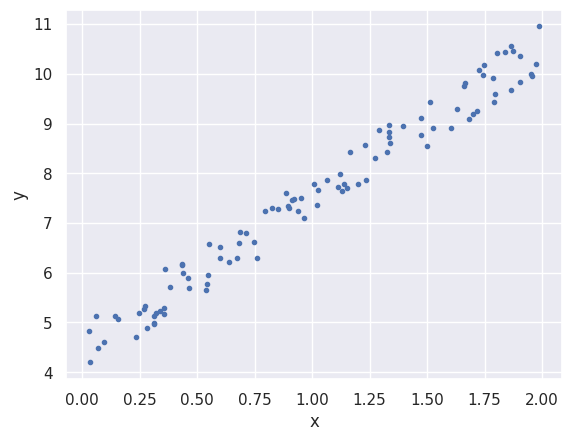

In [36]:
# Daten anzeigen
plt.plot(X,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [37]:
# Erstelle zwei x-Werte zum Testen

X_unknown = np.array([[0],[2]])

## SGD Modell erstellen

Ressourcen: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html


In [38]:
# Lade SGD Modell

from sklearn.linear_model import SGDRegressor

# Erstelle SGDRegressor Instanz
sgd_reg = SGDRegressor() # Standardwerte! -> Verweis auf Dokumentation

# Starte Training
sgd_reg.fit(X,y.ravel())

# Hinweis: Die Dimension des Arrays ist sehr oft kritisch und muss entsprechend angepasst werden.
# Oft hilft hier die Numpy Funktion "ravel"  weiter: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

# Erhalte Vorhersage
y_pred = sgd_reg.predict(X_unknown)

# Zeige Vorhersage
print(y_pred)

[ 4.05226369 10.81720342]


In [39]:
# Analysiere LR Ergebnis -> w0 und w1

b = sgd_reg.intercept_ # w0
w = sgd_reg.coef_ # w1

print(b,w)

[4.05226369] [3.38246987]


Erinnerung (Geradengleichung):

$h_w(x) = b + m*x = w_0 + w_1*x_1$


# Vergleich mit Lin Reg

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [40]:
# Lade LinReg Modell

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # Standardwerte! -> Verweis auf Dokumentation
lin_reg.fit(X,y)

y_pred_lr = lin_reg.predict(X_unknown)

# Analysiere LR Ergebnis -> w0 und w1

b_lr = lin_reg.intercept_ # w0
w_lr = lin_reg.coef_ # w1

print(b_lr,w_lr)

[4.44475522] [[3.05492271]]


# Visualisierung


In [41]:
# Für Anzeige der Geraden

Xline = np.linspace(0,2,100)

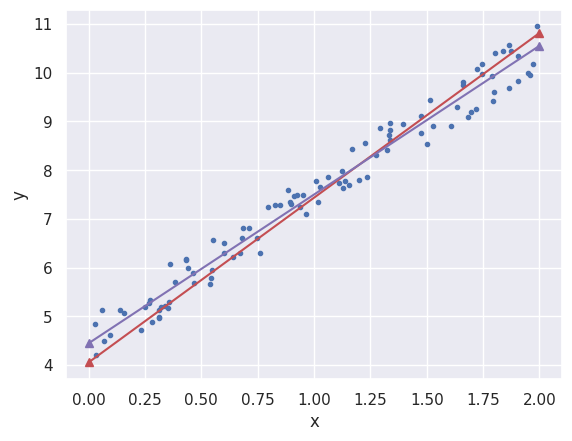

In [42]:
# Plot der Datenmenge und der Gerade und der beiden neuen X_unknown

# Datenmenge
plt.plot(X,y,'b.')

# SGD
plt.plot(X_unknown[0,0],y_pred[0],'r^')
plt.plot(X_unknown[1,0],y_pred[1],'r^')

plt.plot(Xline, w[0]*Xline + b,'r')

# LR
plt.plot(X_unknown[0,0],y_pred_lr[0],'m^')
plt.plot(X_unknown[1,0],y_pred_lr[1],'m^')

plt.plot(Xline, w_lr[0]*Xline + b_lr,'m')

# Sonstiges
plt.xlabel("x")
plt.ylabel("y")

plt.show()

# Hyperparameter der SGD ändern

Es werden unterschiedlich parametrierte SGDRegressor Modelle erstellt.


[SGD Hyperparams] squared_error	1000	invscaling (0.010000)
b=4.057185	w=3.379115	y_pred=4.057185


[SGD Hyperparams] huber	1000	invscaling (0.010000)
b=3.415049	w=3.441480	y_pred=3.415049


[SGD Hyperparams] squared_error	500	invscaling (0.010000)
b=4.060560	w=3.375757	y_pred=4.060560


[SGD Hyperparams] squared_error	1000	constant (0.000001)
b=0.677782	w=0.776143	y_pred=0.677782


[SGD Hyperparams] squared_error	1000	constant (0.050000)
b=4.473134	w=3.069940	y_pred=4.473134


[SGD Hyperparams] huber	500	invscaling (0.010000)
b=3.415103	w=3.441445	y_pred=3.415103


[SGD Hyperparams] squared_error	2000	constant (0.050000)
b=4.449876	w=3.101227	y_pred=4.449876




/home/felixhoffmnn/.cache/pypoetry/virtualenvs/machine-learning-WMNS_BmF-py3.10/lib64/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


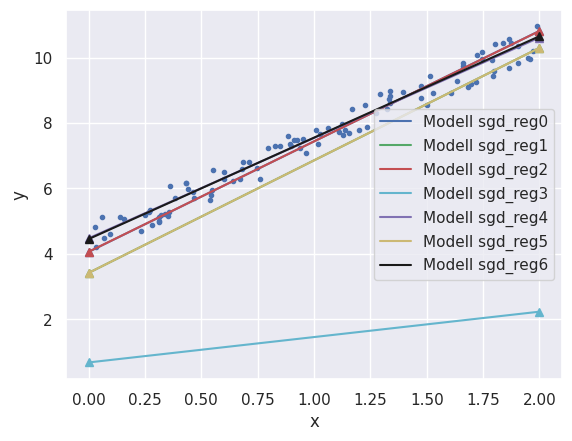

In [43]:
# Instanzen anlegen
sgd_reg1 = SGDRegressor(loss="huber") # Standard = "squared_loss"
sgd_reg2 = SGDRegressor(max_iter=500) # Standard = 1000
sgd_reg3 = SGDRegressor(learning_rate="constant", eta0=0.000001) # Standard = "invscaling" / 0.01
sgd_reg4 = SGDRegressor(learning_rate="constant", eta0=0.05)
sgd_reg5 = SGDRegressor(loss="huber", max_iter=500) 
sgd_reg6 = SGDRegressor(learning_rate="constant", eta0=0.05, max_iter=2000) 

# Instanzen zusammenfassen (für Schleife)
sgd_list = [sgd_reg, sgd_reg1, sgd_reg2, sgd_reg3, sgd_reg4, sgd_reg5, sgd_reg6]
colorlist = ['b','g','r','c','m','y','k']

# Datenmenge
plt.plot(X,y,'b.')

c = -1 # Counter für Farben
for sgd in sgd_list:
  c += 1 # Liste startet mit 0
  
  # Training
  sgd.fit(X,y.ravel())
 
  # Vorhersage
  y_pred_i = sgd.predict(X_unknown)

  # Gewichte auslesen
  b = sgd.intercept_ # w0
  w = sgd.coef_ # w1

  # Gebe relevante Informationen des aktuellen Modells aus
  print("[SGD Hyperparams] %s\t%d\t%s (%f)" % (sgd.loss, sgd.max_iter, sgd.learning_rate, sgd.eta0))
  print("b=%f\tw=%f\ty_pred=%f\n\n" % (b[0],w[0],y_pred_i[0]))

  # Zeichne aktuelles Modell
  plt.plot(X_unknown[0,0],y_pred_i[0],"%s^" % (colorlist[c]))
  plt.plot(X_unknown[1,0],y_pred_i[1],"%s^" % (colorlist[c]))
  plt.plot(Xline, w[0]*Xline + b,colorlist[c],label="Modell sgd_reg%d" % (c))

  plt.xlabel("x")
  plt.ylabel("y")

  plt.legend()

# Zeige Plot mit allen Modellen
plt.show()

# Selbststudium

Im Folgenden wird kurz gezeigt wie die Eingangsdaten $\vec x$ des Modells "skaliert" werden können.
Für viele Modelle ist es zwingend notwendig die Eingangsdatensätze in einen gewissen Wertebereich zu transformieren: oft sollten die Eingangsdaten so aussehen, als ob diese "normalverteilt" sind.

Im Folgenden wird die Anwendung des "StandardScaler" vorgestellt, der die Daten entsprechend "verteilt".

Weitere Informationen dazu gibt es hier: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [44]:
# Lade Bibliothek
from sklearn.preprocessing import StandardScaler

# Erstelle Instanz
scaler = StandardScaler()

# "Lerne" die Instanz mit den zur Verfügung stehenden Daten an (= Analysiere)
# Hinweis: Es werden immer nur die Eingangsdaten $x$ skaliert, *nicht* die Zielvariable!
scaler.fit(X)

# Wo liegt der Erwartungswert der Daten X?
print("[StandardScaler] Mean = %f " % (scaler.mean_))

# Führe die Skalierung durch 1) Trainingsdaten & 2) Anwendungsdaten (unbekannte Daten)
X_scaled = scaler.transform(X)
X_unknown_scaled = scaler.transform(X_unknown) # Transformation gemäß den Trainingsdaten


[StandardScaler] Mean = 1.011993 


## Visualisiere


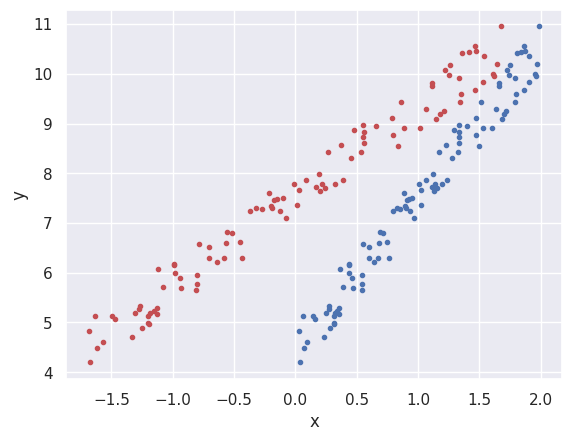

In [45]:
# Zeichne die Datenpunkte

# Datenmenge
plt.plot(X,y,'b.') # ursprüngliche Datenmenge
plt.plot(X_scaled,y,'r.') # transformierte Datenmenge

plt.xlabel("x")
plt.ylabel("y")

plt.show()

## Anwendung mit Modell


In [46]:
# Erstelle eine neue Modellinstanz
sgd_reg_scaling = SGDRegressor() # Standardwerte! -> Verweis auf Dokumentation

# Starte Training
sgd_reg_scaling.fit(X_scaled,y.ravel())

# Erhalte Vorhersage
y_pred_scaled = sgd_reg_scaling.predict(X_unknown_scaled)

# Zeige Vorhersage
print(y_pred_scaled)

[ 4.42132762 10.50065867]


In [47]:
# Vgl. Vorhersage mit nicht transformierten Daten
print(y_pred)

[ 4.05226369 10.81720342]
